# Se busca hacer un analisis sobre la pobreza multidimensional en varios paises, para esto utilizamos la base de datos MPI National
## Esta es una base de datos producto de una investgacion por la universidad de Oxford
### Sergio Zamora Rueda A01730433

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm

In [5]:
df=pd.read_csv('datasets/MPI_national.csv')
df.head(2)

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.0,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.0,0.1,41.4,0.002,0.50,40.3


## Instalamos todas las librerias a utilizar y leemos la base de datos a analizar

In [6]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Definimos el estilo a utilizar de nuestras graficas como 'Seaborn_White'
## A continuacion hacemos un analisis de los datos que se tienen en la base de datos

In [7]:
df.columns

Index(['ISO', 'Country', 'MPI Urban', 'Headcount Ratio Urban',
       'Intensity of Deprivation Urban', 'MPI Rural', 'Headcount Ratio Rural',
       'Intensity of Deprivation Rural'],
      dtype='object')

# ¿Cuántas variables hay y de qué tipos son?, ¿Por qué es importante conocer esta información?
## Comenzamos por saber que se tienen 8 columnas con datos que van desde el pais, dividiendo en varios sectores poblacionales y obteniendo la privacion de servicios y oportunidades como el principal indicador de la pobreza multidimensional, para este ejercicio buscaremos analizar que factores afectan a la pobreza multidimensional que se presenta. Es importante conocer los tipos de datos para poder hacer un mejor analisis y conocer como es que esta formada nuestra base de datos
## Sabemos tambien que la mayoria de nuestra variables son float siendo numeros decimales y teniendo 2 variables que son objetos siendo estos los paises y las nomenclaturas de los paises

In [8]:
df.dtypes

ISO                                object
Country                            object
MPI Urban                         float64
Headcount Ratio Urban             float64
Intensity of Deprivation Urban    float64
MPI Rural                         float64
Headcount Ratio Rural             float64
Intensity of Deprivation Rural    float64
dtype: object

# ¿Qué distribución sigue la variable de interés ('MPI urban' y 'MPI rural')?
## Analizaremos a fondo la variable de MPI urbano dado que esta simboliza la pobreza multidimensional que se vive en los espacios urbanos de un pais asi como en los rurales
### La variable de MPI independientemente de si es rural o urbano simboliza un coeficiente que va desde el 0.0 hasta el 1 y es traducido literalmente como el indice de pobreza multidimensional, lo cual nos indica cuan pobre es una poblacion con relacion a carencias que van mas alla de lo economico

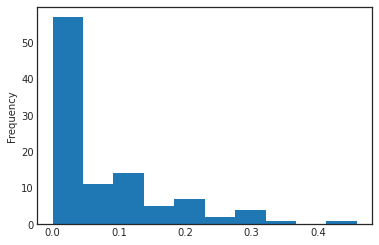

In [9]:
df['MPI Urban'].plot.hist()

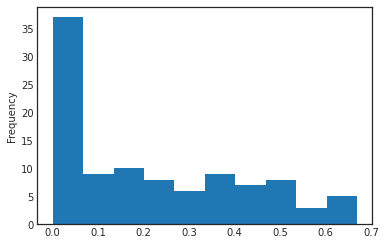

In [10]:
df['MPI Rural'].plot.hist()

# Conclusiones analisis de distribucion
## Podemos observar claramente que en ambos casos en la distribucion existe un sesgo positivo hacia la derecha, detrminando que la mayor parte de las variables se encuentran con un indice de pobreza multidimensional muy cercano al 0.0 y mas alejados del 1

# ¿Cuál es la variable de mayor correlación con las variables de interés ('MPI urban' y ('MPI rural')?

In [11]:
df.corr()

,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
MPI Urban,1.000000,0.995981,0.880024,0.922065,0.887147,0.884069
Headcount Ratio Urban,0.995981,1.000000,0.884032,0.939615,0.913555,0.896901
Intensity of Deprivation Urban,0.880024,0.884032,1.000000,0.892678,0.878833,0.904428
MPI Rural,0.922065,0.939615,0.892678,1.000000,0.986750,0.966458
Headcount Ratio Rural,0.887147,0.913555,0.878833,0.986750,1.000000,0.940608
Intensity of Deprivation Rural,0.884069,0.896901,0.904428,0.966458,0.940608,1.000000


In [12]:
vars=['ISO', 'Country', 'MPI Urban', 'MPI Rural']                                

# Conlcusiones analisis de correlacion
## Podemos determinar que las variables de mayor correlacion con el MPI las variables Head Count Ratio de cada una de las zonas, esta variable indica el porcentaje de la poblacion en esa zona listada como pobre, mediante este analisis podremos determinar si el indice de pobreza esta directamente relacionado con el numero de pobres en un pais

In [13]:
#Cambiamos el nombre de las columnas para su uso mas sencillo

In [14]:
df = df.rename(columns = {'MPI Urban': 'MPIU', 'MPI Rural': 'MPIR', 'Headcount Ratio Urban':'HRU', 'Headcount Ratio Rural':'HRR' }, inplace = False)

In [15]:
df.head(2)

,ISO,Country,MPIU,HRU,Intensity of Deprivation Urban,MPIR,HRR,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.0,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.0,0.1,41.4,0.002,0.50,40.3


# Analisis de variables
## Analizamos las variables a estudiar en contra de aquellas que tiene la mayor correlacion a traves de la regresion
### Luego procedemos a hacer una grafica de regresion para responder ¿Cual es el comportamiento entre las variables de interes?

In [16]:
#Tabla de regresion para zona urbana

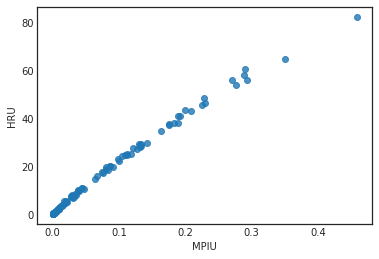

In [17]:
rpu=sns.regplot(x='MPIU',
               y='HRU',
               data=df,
                fit_reg=False
              )

In [18]:
#Tabla de regresion para zona rural

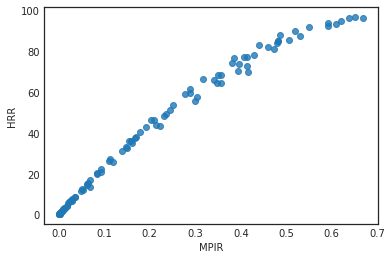

In [19]:
rpr=sns.regplot(x='MPIR',
               y='HRR',
               data=df,
                fit_reg=False  
              )

# Conclusion analisis de regresion
## Determinamos por medio de las regresiones anteriores que los indicativos en las zonas urbanas estan mas ajustados que aquellos de zonas rurales

# ¿Existen valores atipicos en las variables?
## A contuniacion analizaremos por medio de Boxplots la existencia de valores atipicos en las variables de MPI analizadas

In [20]:
pivot=pd.pivot_table(df,
               index='Country',
                       values=['MPIU', 'MPIR']
                     )
pivot

,MPIR,MPIU
Country,,
Afghanistan,0.347,0.132
Albania,0.007,0.003
Algeria,0.011,0.003
Armenia,0.001,0.001
Azerbaijan,0.035,0.009
...,...,...
Vanuatu,0.155,0.039
Viet Nam,0.036,0.013
Yemen,0.304,0.080


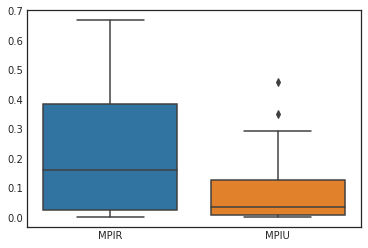

In [21]:
sns.boxplot(data=pivot)

# Conclusiones analisis de datos atipicos
## Como podemos observar por las boxplots anteriores podemos encontrar que la variable del indice de pobreza multidimensional urbana cuenta con dos valores atipicos, lo que puede explicar su comportamiento menos ajustado en las graficas de regresion, podemos afirmar que estos no afectan de manera significativa el comportamiento de la variable

# ¿Qué tan bueno es el análisis de regresión?, ¿Qué indica la R-cuadrada?, ¿y los P-value de los parámetros B0 y B1?,¿el Durbir-Watson?

In [22]:
model=sm.OLS.from_formula('MPIU~HRU', data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MPIU   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.237e+04
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          1.31e-106
Time:                        18:04:50   Log-Likelihood:                 343.39
No. Observations:                 102   AIC:                            -682.8
Df Residuals:                     100   BIC:                            -677.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0065      0.001     -5.708      0.000      -0.009      -0.004
HRU            0.0050   4.54e-05    111.203      0.000       0.005       0.005
==============================================================================
Omnibus:                       76.036   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.104
Skew:                           2.292   Prob(JB):                    3.71e-140
Kurtosis:                      14.405   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model=sm.OLS.from_formula('MPIR~HRR', data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MPIR   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3699.
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           8.39e-81
Time:                        18:04:50   Log-Likelihood:                 204.82
No. Observations:                 102   AIC:                            -405.6
Df Residuals:                     100   BIC:                            -400.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0242      0.005     -4.755      0.000      -0.034      -0.014
HRR            0.0060   9.81e-05     60.818      0.000       0.006       0.006
==============================================================================
Omnibus:                       18.937   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.416
Skew:                           0.915   Prob(JB):                     3.03e-06
Kurtosis:                       4.623   Cond. No.                         81.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion de modelos de regresion
## En ambas variable spodemos observar que existe una R2 por arriba del 96% lo cual nos indica que son regresiones muy bien ajustadas y complementa la reflexion anteriormpor ejemplo en el caso de las zonas Rurales que en realidad no tienen mucha significancia los 2 valores atipicos que se encuentran
## Tambien contamos con un valor de P-Value en ambos casos menor al 0.5 lo cual nos habla de una correlacion fuerte y existente ademas de comprobar que los valores B0 y B1 estan bien ajustados
## Segun el analisis del valor de Durbin Watson que se encuentra entre el 1 y el 2 podemos afrimar que existe una correlacion serial positiva
## En conclusion podemos afirmar que el modelo es correcto y existe una correlacion directa entre el porcentaje de pobres por zona de cada pais y su indice de pobreza multidimensional 

# ¿Existe una corrrelacion entre el indice de pobreza en zonas rurales y el indice de pobreza en zonas urbanas por pais?
## Para contestar a esta ultima pregunta del analisis haremos una grafica de regresion con su respectivo resumen de analisis y determinaremos la respuesta a esta pregunta

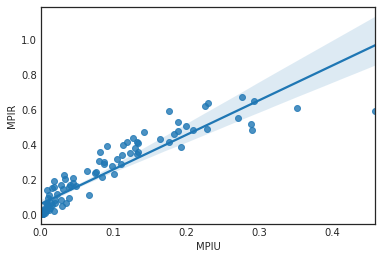

In [24]:
rpr=sns.regplot(x='MPIU',
               y='MPIR',
               data=df, 
              )

## Conclusion
### Del primer analisis por la grafica de regresion podemos observar que si existe una correlacion entre las variables pero no es tan fuerte como las relaciones antes estudiadas

In [25]:
model=sm.OLS.from_formula('MPIR~MPIU', data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MPIR   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     567.6
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           5.13e-43
Time:                        18:04:50   Log-Likelihood:                 116.14
No. Observations:                 102   AIC:                            -228.3
Df Residuals:                     100   BIC:                            -223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0595      0.010      5.883      0.000       0.039       0.080
MPIU           1.9802      0.083     23.824      0.000       1.815       2.145
==============================================================================
Omnibus:                       25.810   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.141
Skew:                          -0.791   Prob(JB):                     3.96e-18
Kurtosis:                       7.044   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion final
# Del analisis anterior podemos determinar que no existe una correlacion demasiado robusta entre la pobreza en zonas urbanas y rurales, pero aun asi es lo suficientemente buena para que exista una relacion relevante 
## Esto nos ayuda a poder decir con certeza que el indice de pobreza en zonas rurales de un pais afecta directamente al indice de pobreza en zonas rurales, osease que dentro de los paises analizados el tener una poblacion rural con un alto indice de pobreza significa que la poblacion en zonas urbanas tambien presente signos de pobreza.
## Encontramos tambien que un factor muy determinante para el indice de pobreza es el numero de pobres, es decir, mientras mayor sea el indice de pobreza mas pobres habra